## Importing Libraries

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [179]:
dataset = pd.read_csv("StudentsPerformance.csv")
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Checking for any Null Values

In [180]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [181]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Therefore no null values in Data

## Exploratory data analysis

### Count of Male and Female Candidates

[]

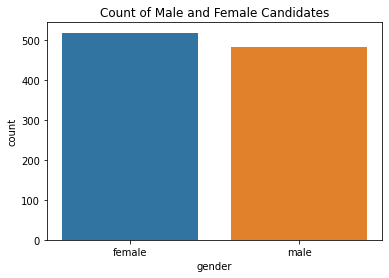

In [182]:
sns.countplot(x="gender", data=dataset)
plt.title("Count of Male and Female Candidates")
plt.plot()

### Count of Male and Female Candidates by Group

[]

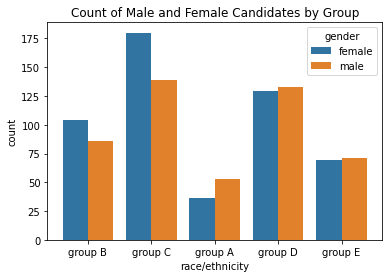

In [183]:
sns.countplot(x="race/ethnicity", hue="gender", data=dataset)
plt.title("Count of Male and Female Candidates by Group")
plt.plot()

## Feature Engineering

#### Creating Total Score Column for Easier analysis

In [184]:
dataset["Total Score"] = dataset["math score"] + dataset["reading score"] + dataset["writing score"]

In [185]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### Total Scores of All Candidates

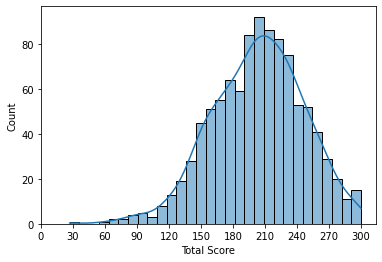

In [186]:
sns.histplot(dataset["Total Score"], kde=True, bins=30)
plt.xticks(np.arange(0, 310, 30))
plt.show()

Text(0.5, 1.0, 'Math Score')

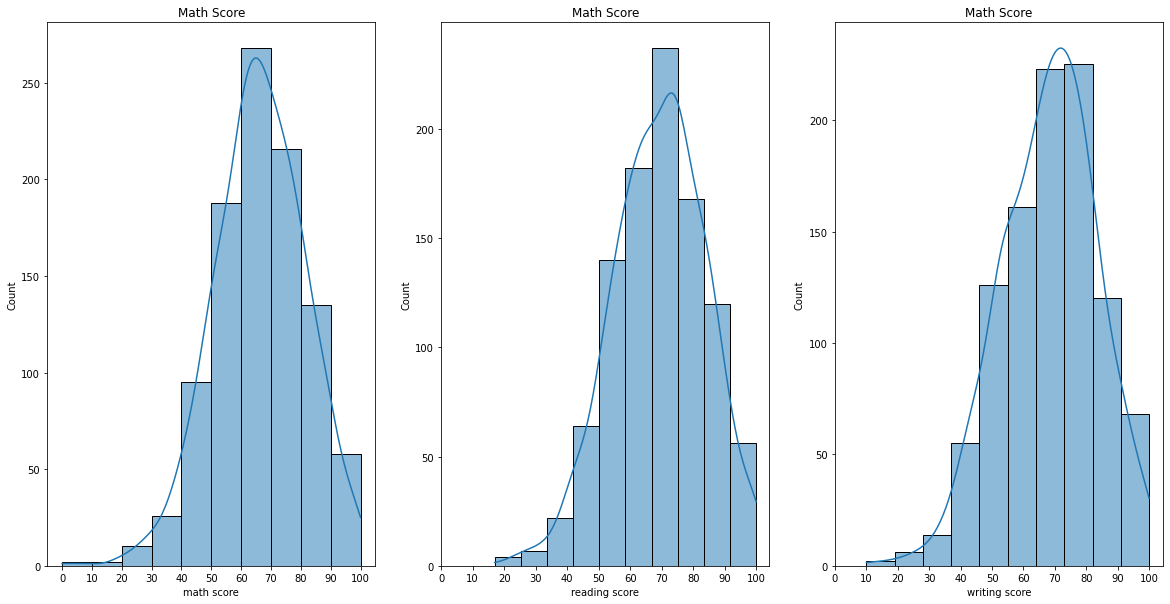

In [187]:
f,ax=plt.subplots(1,3,figsize=(20, 10))

sns.histplot(dataset["math score"], kde=True, bins=10, ax=ax[0])
ax[0].set_xticks(np.arange(0, 110, 10))
ax[0].set_title("Math Score")

sns.histplot(dataset["reading score"], kde=True, bins=10, ax=ax[1])
ax[1].set_xticks(np.arange(0, 110, 10))
ax[1].set_title("Math Score")

sns.histplot(dataset["writing score"], kde=True, bins=10, ax=ax[2])
ax[2].set_xticks(np.arange(0, 110, 10))
ax[2].set_title("Math Score")

### Relation Between Parental Education and Candidates Total Score

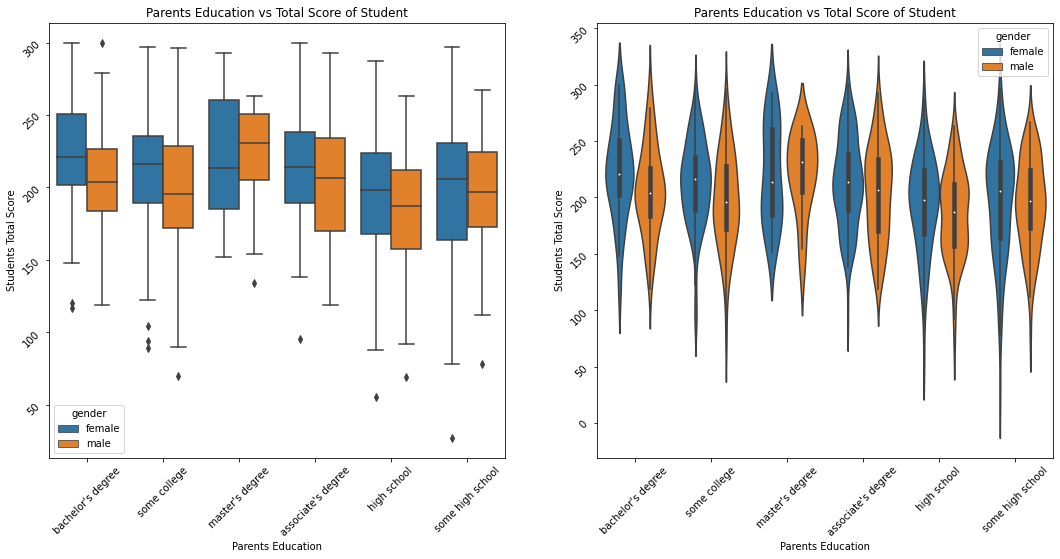

In [188]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.boxplot(x='parental level of education',y='Total Score',data=dataset, hue='gender', ax=ax[0])
ax[0].set_title("Parents Education vs Total Score of Student")
ax[0].set_xlabel("Parents Education")
ax[0].set_ylabel("Students Total Score")
ax[0].tick_params(labelrotation=45)

sns.violinplot(x='parental level of education',y='Total Score',data=dataset, hue='gender', ax=ax[1])
ax[1].set_title("Parents Education vs Total Score of Student")
ax[1].set_xlabel("Parents Education")
ax[1].set_ylabel("Students Total Score")
ax[1].tick_params(labelrotation=45)

### Does Test Preparation Course Status Had Effect on The Marks

<AxesSubplot:xlabel='test preparation course', ylabel='Total Score'>

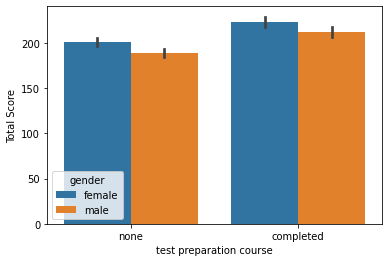

In [189]:
sns.barplot(x="test preparation course", y="Total Score", hue="gender", data=dataset)

#### The Candidates who Completed the Preparation Courser had Slightly Better Scores

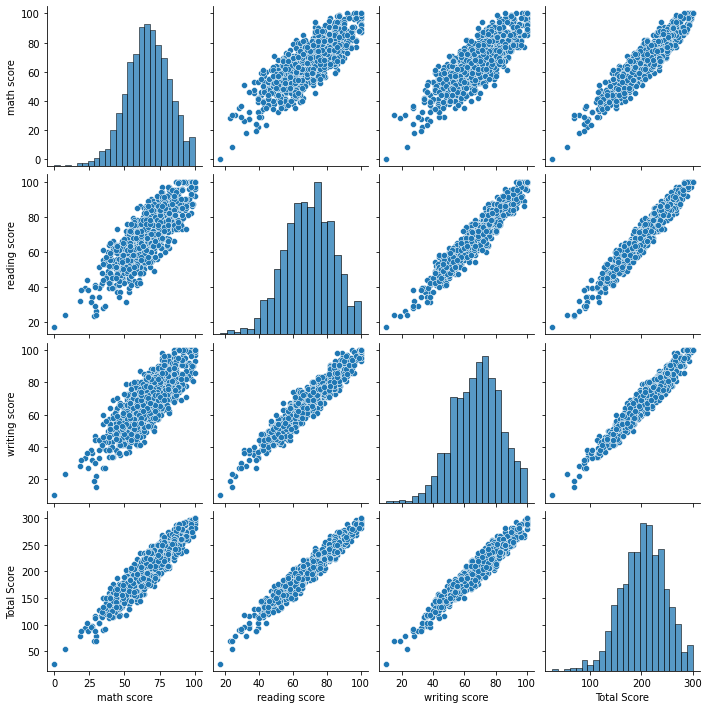

In [190]:
sns.pairplot(data=dataset)

<AxesSubplot:>

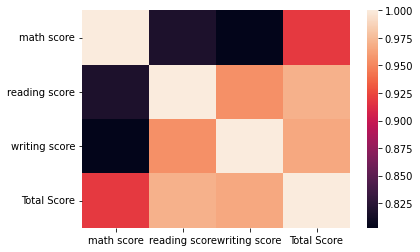

In [191]:
sns.heatmap(data=dataset.corr())